<div> 
<div><h1>Python Audio</h1></div>
</div>

<br/>

<p>
There are several ways to read and write <strong>audio files</strong> in Python, using different packages. This notebooks lists some options and discusses advantages and disadvantages. 

## LibROSA

One option is to use librosa's functions [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html) and `librosa.output.write_wav`. 

* Per default, `librosa.load` resamples the audio to 22050 Hz. Setting `sr=None` keeps the native sampling rate.
* Loaded audio is always converted to float in the range of $[-1, 1]$.
* `librosa.load` is able to read mp3-files when [`ffmpeg`](https://ffmpeg.org/) is available.
* `librosa.output.write_wav` always uses the data type of the numpy array (e.g. 64-bit float).

Note that some of the librosa functionality for reading and writing audio files may be dropped in later versions as 
[discussed in this thread](https://github.com/librosa/librosa/issues/509).

WAV file:  Fs = 11025, x.shape = (45504,), x.dtype = float32


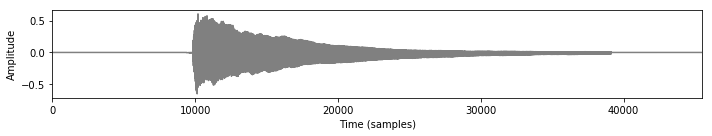

MP3 file:  Fs = 11025, x.shape = (47232,), x.dtype = float32


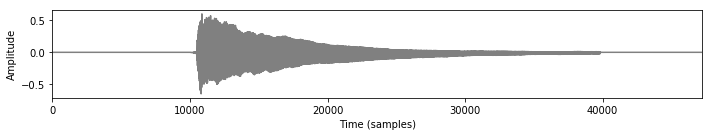

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import IPython.display as ipd
import librosa
import pandas as pd
%matplotlib inline

def print_plot_play(x, Fs, text=''):
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    plt.figure(figsize=(10, 2))
    plt.plot(x, color='gray')
    plt.xlim([0, x.shape[0]])
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    ipd.display(ipd.Audio(data=x, rate=Fs))

# Read wav
fn_wav = os.path.join('audio', 'C4_Piano.wav')
x, Fs = librosa.load(fn_wav, sr=None)
print_plot_play(x=x, Fs=Fs, text='WAV file: ')

# Read mp3
fn_mp3 = os.path.join('audio', 'C4_Piano.mp3')
x, Fs = librosa.load(fn_mp3, sr=None)
print_plot_play(x=x, Fs=Fs, text='MP3 file: ')

Generated signal:  Fs = 8000, x.shape = (8000,), x.dtype = float64


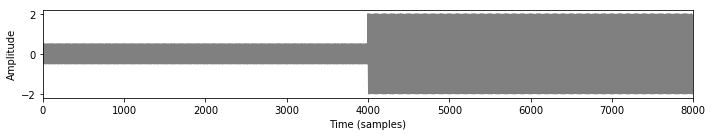

Generated signal:  Fs = 8000, x.shape = (37,), x.dtype = float64


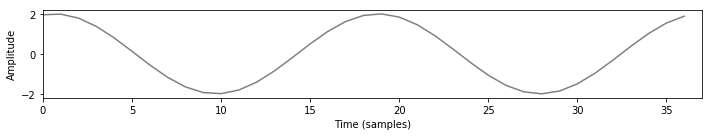

Signal after writing and reading:  Fs = 8000, x.shape = (8000,), x.dtype = float32


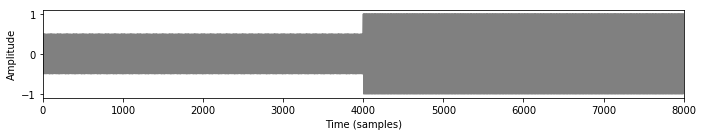

Signal after writing and reading:  Fs = 8000, x.shape = (37,), x.dtype = float32


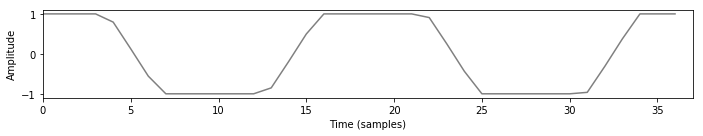

In [13]:
# Generate signal
Fs = 8000
x_05 = 0.5 * np.cos(2 * np.pi * 440 * np.arange(0, Fs//2) / Fs)
x_2 = 2 * np.cos(2 * np.pi * 440 * np.arange(0, Fs//2) / Fs)
x = np.concatenate([x_05, x_2])
print_plot_play(x=x, Fs=Fs, text='Generated signal: ')

print_plot_play(x=x[-2*8000//440:], Fs=Fs, text='Generated signal: ')


# Write signal as wav (float; int16 not possible)
# Note that librosa applies some normalization and clipping
fn_out = os.path.join('audio','sine.wav')
librosa.output.write_wav(fn_out, x, Fs)

# Read generated signal
x, Fs = librosa.load(fn_out, sr=None)
print_plot_play(x=x,Fs=Fs,text='Signal after writing and reading: ')

print_plot_play(x=x[-2*8000//440:],Fs=Fs,text='Signal after writing and reading: ')

## PySoundFile

The audio library [`PySoundFile`](https://pysoundfile.readthedocs.io/en/0.9.0/), which is supported by several several other libraries, yields also functions for reading and writing sound files. In particular, it contains the functions [`soundfile.read`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.read) and [`soundfile.write`](https://pysoundfile.readthedocs.io/en/latest/#soundfile.write). 

* Per default, the loaded audio is converted to float in the range of $[-1, 1]$. This can be changed with the `dtype` keyword.
* When writing, it uses signed 16 bit PCM (`subtype='PCM_16'`) as default.
* There are no resampling options.
* There is no option to read mp3 files.


WAV file (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


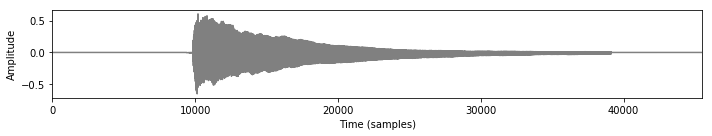

WAV file (dtype=int16):  Fs = 11025, x.shape = (45504,), x.dtype = int16


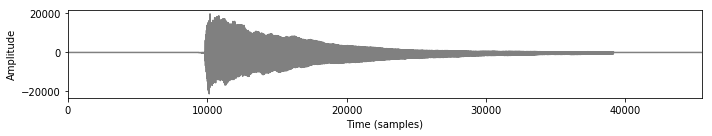

Signal (int16) after writing and reading (default):  Fs = 11025, x.shape = (45504,), x.dtype = float64


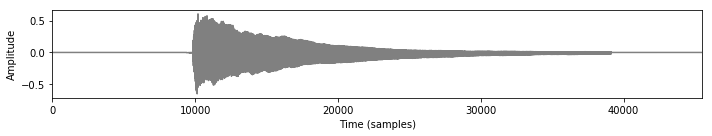

In [3]:
import soundfile as sf

# Read wav with default
fn_wav = os.path.join('audio', 'C4_Piano.wav')
x, Fs = sf.read(fn_wav)
print_plot_play(x=x,Fs=Fs,text='WAV file (default): ')

# Read wav with dtype= 'int16'
fn_wav = os.path.join('audio', 'C4_Piano.wav')
x, Fs = sf.read(fn_wav, dtype= 'int16')
print_plot_play(x=x,Fs=Fs,text='WAV file (dtype=int16): ')

# Write signal 'int16'-signal and read with default
fn_out = os.path.join('audio', 'C4_Piano_int16.wav')
sf.write(fn_out, x, Fs)
x, Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Signal (int16) after writing and reading (default): ')

Generated signal:  Fs = 8000, x.shape = (8000,), x.dtype = float64


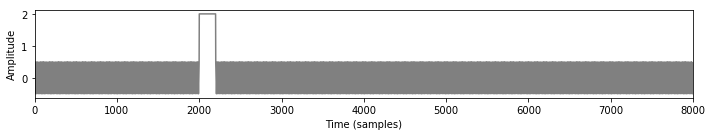

Default for writing files: PCM_16
Signal after writing and reading:  Fs = 8000, x.shape = (8000,), x.dtype = float64


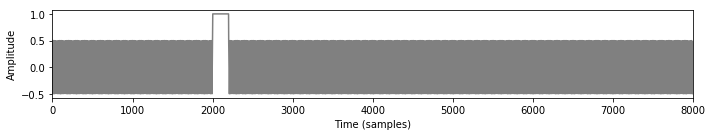

In [4]:
# Generate signal
Fs = 8000
x = 0.5 * np.cos(2 * np.pi * 440 * np.arange(0, Fs) / Fs)
x[2000:2200] = 2
print_plot_play(x=x,Fs=Fs,text='Generated signal: ')

# Write signal
# Default: 'PCM_16'
# Equivalent to pre-processing (dithering + quantization) 
# x = np.int16(np.round(x*(2**15)))
# 
print('Default for writing files:', sf.default_subtype('WAV'))
fn_out = os.path.join('..', 'output', 'B', 'FMP_B_PythonAudio_sine.wav')
sf.write(fn_out, x, Fs, subtype='PCM_16')

# Read generated signal
x, Fs = sf.read(fn_out)
print_plot_play(x=x,Fs=Fs,text='Signal after writing and reading: ')

## SciPy

Scipy offers the [`scipy.io.wavfile`](https://docs.scipy.org/doc/scipy/reference/io.html#module-scipy.io.wavfile) module, which also has functionalities for reading and writing wav files. However, not all variants of the wav format are support. For example, 24-bit integer wav files are not allowed. Furthermore, certain metadata fields in a wav file may also lead to errors.

In [5]:
from scipy.io import wavfile

Fs, x = wavfile.read(fn_wav)

## Normalized Audio Playback 

We introduced the class

`IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False, normalize=True, *, element_id=None)`

for audio playback ([`IPython` version 6.0 or higher](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)). As default, this class **normalizes** the audio (dividing by the maximum over all sample values) before playback. This may be unwanted for certain applications, where the volume of the audio should be kept to its original level. To avoid normalization, one has to set the parameter `normalize=False`. However, this requires that all samples of the audio lie within the range between $-1$ and $-1$. In the following code cell, we give an illustrative examples for the two options.

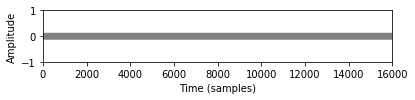

Audio playback with default settings (normalized audio)


Audio playback without normalization (original audio) 


In [5]:
Fs = 8000
x = 0.1 * np.cos(2 * np.pi * 440 * np.arange(0, 2*Fs) / Fs)

plt.figure(figsize=(6, 1.5))
plt.plot(x, color='gray')
plt.xlim([0, x.shape[0]])
plt.ylim([-1, 1])
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

print('Audio playback with default settings (normalized audio)')
ipd.display(ipd.Audio(data=x, rate=Fs))

print('Audio playback without normalization (original audio) ')
ipd.display(ipd.Audio(data=x, rate=Fs, normalize=False))